### Import Module

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

### Data Ingestion

In [2]:
mnist = tf.keras.datasets.mnist

### Split Data

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255 

11490434/11490434 [==============================] - 2s 0us/step


### Define model

In [4]:
CLASSES = len(np.unique(y_train))

LAYERS = [
    tf.keras.layers.Flatten(input_shape=(28, 28), name="inputLayer"), # 784
    tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer01"), # 300
    tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer02"), # 100
    tf.keras.layers.Dense(CLASSES, activation="softmax", name="outputLayer"), # 10
]

model_clf = tf.keras.models.Sequential(LAYERS)
model_clf.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


2022-09-26 01:35:41.488365: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-26 01:35:41.488801: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


INFO:tensorflow:Assets written to: ram://b8840789-cd78-430c-a243-3bbde32ff4e4/assets


INFO:tensorflow:Assets written to: ram://b8840789-cd78-430c-a243-3bbde32ff4e4/assets


### Compile model

In [5]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS = "SGD"

model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZERS)

INFO:tensorflow:Assets written to: ram://1225a907-bbee-4194-b4df-08bd901bf492/assets


INFO:tensorflow:Assets written to: ram://1225a907-bbee-4194-b4df-08bd901bf492/assets


INFO:tensorflow:Assets written to: ram://a4230e02-1c7f-4c07-8976-1780c62261cc/assets


INFO:tensorflow:Assets written to: ram://a4230e02-1c7f-4c07-8976-1780c62261cc/assets


### Train model

In [6]:
EPOCHS = 5

VALIDATION = (X_valid, y_valid)

history = model_clf.fit(
    X_train,
    y_train,
    epochs = EPOCHS,
    batch_size=32,
    validation_data = VALIDATION
)

INFO:tensorflow:Assets written to: ram://f4abb09b-0392-4d64-8fa1-f3d991baecc5/assets


INFO:tensorflow:Assets written to: ram://f4abb09b-0392-4d64-8fa1-f3d991baecc5/assets


INFO:tensorflow:Assets written to: ram://a3720c25-a7fa-49fb-bbc8-25ab1dee2fac/assets


INFO:tensorflow:Assets written to: ram://a3720c25-a7fa-49fb-bbc8-25ab1dee2fac/assets


Epoch 1/5


2022-09-26 01:37:44.504457: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-26 01:37:44.623728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1717/1719 [============================>.] - ETA: 0s - loss: 0.6190

2022-09-26 01:37:52.006601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 8s 4ms/step - loss: 0.6189 - val_loss: 0.3088
Epoch 2/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2906 - val_loss: 0.2461
Epoch 3/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2399 - val_loss: 0.2081
Epoch 4/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2056 - val_loss: 0.1835
Epoch 5/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1803 - val_loss: 0.1671


INFO:tensorflow:Assets written to: ram://391980a9-f4f0-4a30-9995-104f875dbbbd/assets


INFO:tensorflow:Assets written to: ram://391980a9-f4f0-4a30-9995-104f875dbbbd/assets


INFO:tensorflow:Assets written to: ram://00cfcc29-62b5-483a-9616-724cc41feb9c/assets


INFO:tensorflow:Assets written to: ram://00cfcc29-62b5-483a-9616-724cc41feb9c/assets


### Evaluate model

In [7]:
model_clf.evaluate(X_test, y_test)

INFO:tensorflow:Assets written to: ram://34196792-fecd-4bb8-b82d-cbda6727b8ec/assets


INFO:tensorflow:Assets written to: ram://34196792-fecd-4bb8-b82d-cbda6727b8ec/assets


INFO:tensorflow:Assets written to: ram://a36fe841-afd3-43eb-acb1-3b7a027b4d40/assets


INFO:tensorflow:Assets written to: ram://a36fe841-afd3-43eb-acb1-3b7a027b4d40/assets


INFO:tensorflow:Assets written to: ram://e48345ac-2ed5-4f1f-8e82-19c05dfe4528/assets


INFO:tensorflow:Assets written to: ram://e48345ac-2ed5-4f1f-8e82-19c05dfe4528/assets


INFO:tensorflow:Assets written to: ram://a1acccaf-d179-4374-815c-33a58e8e13ab/assets


INFO:tensorflow:Assets written to: ram://a1acccaf-d179-4374-815c-33a58e8e13ab/assets


313/313 [==============================] - 1s 3ms/step - loss: 0.1609


INFO:tensorflow:Assets written to: ram://d78c8da5-a13f-44a0-81f7-f71b0afcbaf1/assets


INFO:tensorflow:Assets written to: ram://d78c8da5-a13f-44a0-81f7-f71b0afcbaf1/assets


INFO:tensorflow:Assets written to: ram://facfc4e3-c3bd-4f54-87a2-402a01d119be/assets


INFO:tensorflow:Assets written to: ram://facfc4e3-c3bd-4f54-87a2-402a01d119be/assets


0.1609240621328354

### Save model

In [8]:
model_clf.save("mnist_full.h5")

INFO:tensorflow:Assets written to: ram://6ddb35cc-6608-49a8-8f1d-14b04b39725f/assets


INFO:tensorflow:Assets written to: ram://6ddb35cc-6608-49a8-8f1d-14b04b39725f/assets


INFO:tensorflow:Assets written to: ram://11e23035-2e88-4672-8573-88cbaf5d0c6b/assets


INFO:tensorflow:Assets written to: ram://11e23035-2e88-4672-8573-88cbaf5d0c6b/assets


INFO:tensorflow:Assets written to: ram://51de549b-734d-4db9-88b9-850ac6d1cf75/assets


INFO:tensorflow:Assets written to: ram://51de549b-734d-4db9-88b9-850ac6d1cf75/assets


INFO:tensorflow:Assets written to: ram://e0eee3f8-bdd5-43d8-908d-d55c96a53439/assets


INFO:tensorflow:Assets written to: ram://e0eee3f8-bdd5-43d8-908d-d55c96a53439/assets


INFO:tensorflow:Assets written to: ram://ab2517da-0ec3-4720-835f-bbd3caf525d5/assets


INFO:tensorflow:Assets written to: ram://ab2517da-0ec3-4720-835f-bbd3caf525d5/assets


INFO:tensorflow:Assets written to: ram://55227ebe-4d9e-487c-9090-721f372d78f2/assets


INFO:tensorflow:Assets written to: ram://55227ebe-4d9e-487c-9090-721f372d78f2/assets


### Inferencing

INFO:tensorflow:Assets written to: ram://14805650-2461-4b80-b591-1e93a502e951/assets


INFO:tensorflow:Assets written to: ram://14805650-2461-4b80-b591-1e93a502e951/assets


INFO:tensorflow:Assets written to: ram://84576d33-5bff-408f-bcfc-53bea81928a4/assets


INFO:tensorflow:Assets written to: ram://84576d33-5bff-408f-bcfc-53bea81928a4/assets


INFO:tensorflow:Assets written to: ram://8cfbd33c-473d-45e9-af04-907d83c3bfa1/assets


INFO:tensorflow:Assets written to: ram://8cfbd33c-473d-45e9-af04-907d83c3bfa1/assets


INFO:tensorflow:Assets written to: ram://0a52ef6d-81af-4071-a391-226fecbc758f/assets


INFO:tensorflow:Assets written to: ram://0a52ef6d-81af-4071-a391-226fecbc758f/assets


INFO:tensorflow:Assets written to: ram://cadcfbcb-35ea-429a-9a92-1fba7d49b356/assets


INFO:tensorflow:Assets written to: ram://cadcfbcb-35ea-429a-9a92-1fba7d49b356/assets


INFO:tensorflow:Assets written to: ram://d954372b-9e97-4276-a06d-0291105dfe3f/assets


INFO:tensorflow:Assets written to: ram://d954372b-9e97-4276-a06d-0291105dfe3f/assets
2022-09-26 01:40:44.596738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 103ms/step


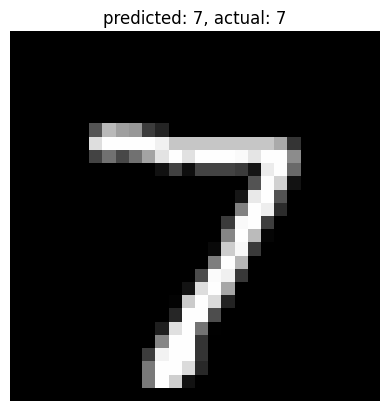

------------------------------------------------------------


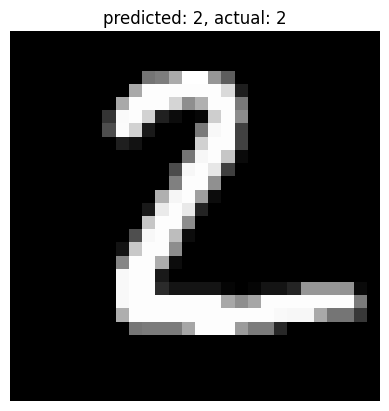

------------------------------------------------------------


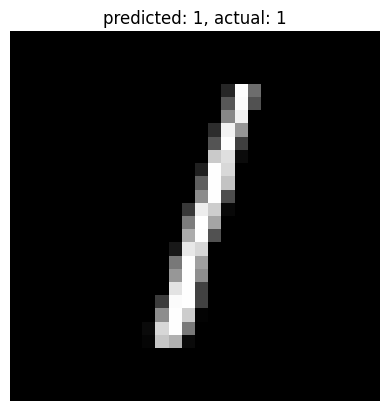

------------------------------------------------------------


INFO:tensorflow:Assets written to: ram://54710bfa-6220-45ee-8b0c-928b48a31e11/assets


INFO:tensorflow:Assets written to: ram://54710bfa-6220-45ee-8b0c-928b48a31e11/assets


INFO:tensorflow:Assets written to: ram://3738fe62-d71f-4b9c-87d8-3a2d90ae8b39/assets


INFO:tensorflow:Assets written to: ram://3738fe62-d71f-4b9c-87d8-3a2d90ae8b39/assets


In [9]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)
Y_pred = np.argmax(y_prob, axis=-1)

for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)